In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('classic')
%matplotlib inline

In [2]:
dir_name = 'mem-output/'
apps = ['base64', 'http', 'json', 'primes', 'markdown2html', 'sentiment']
suffix = '-pages.log'

In [3]:
# four series
# percentage : overlapping / initialized
setup1_pcent=[]
setup2_pcent=[]
setup3_pcent=[]
setup4_pcent=[]
# TODO: raw numbers
setup1_raw_setup = []
setup1_raw_app = []
setup1_raw_both = []
setup2_raw_setup = []
setup2_raw_app = []
setup2_raw_both = []
setup3_raw_setup = []
setup3_raw_app = []
setup3_raw_both = []
setup4_raw_setup = []
setup4_raw_app = []
setup4_raw_both = []

In [4]:

# fill the four series
for app in apps:
    with open(dir_name + app + suffix) as infile:
        cnt = 0
        for line in infile:
            data = list(map(int, line.strip().split(',')))
            if len(data) == 3:
                if cnt == 0:
                    setup1_raw_setup.append(data[0])
                    setup1_raw_app.append(data[1])
                    setup1_raw_both.append(data[2])
                    setup1_pcent.append(data[-1]/data[0]*100)
                elif cnt == 1:
                    setup2_raw_setup.append(data[0])
                    setup2_raw_app.append(data[1])
                    setup2_raw_both.append(data[2])
                    setup2_pcent.append(data[-1]/data[0]*100)
                elif cnt == 2:
                    setup3_raw_setup.append(data[0])
                    setup3_raw_app.append(data[1])
                    setup3_raw_both.append(data[2])
                    setup3_pcent.append(data[-1]/data[0]*100)
                elif cnt == 3:
                    setup4_raw_setup.append(data[0])
                    setup4_raw_app.append(data[1])
                    setup4_raw_both.append(data[2])
                    setup4_pcent.append(data[-1]/data[0]*100)
                cnt += 1
#print(setup1_pcent)
#print(setup2_pcent)
#print(setup3_pcent)
#print(setup4_pcent)

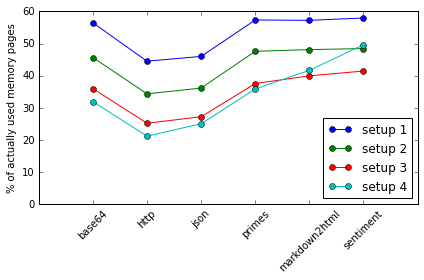

In [5]:
df = pd.DataFrame({'x': range(1,7), 'setup 1': setup1_pcent, 'setup 2': setup2_pcent, 'setup 3': setup3_pcent, 'setup 4': setup4_pcent})

plt.plot('x', 'setup 1', data=df, marker='o')
plt.plot('x', 'setup 2', data=df, marker='o')
plt.plot('x', 'setup 3', data=df, marker='o')
plt.plot('x', 'setup 4', data=df, marker='o')
plt.legend(loc='best')
plt.ylabel('% of actually used memory pages')
plt.ylim(bottom=0, top=60)
plt.xlim(left=0, right=7)
plt.xticks(range(1,7), apps, rotation=45)
plt.tight_layout()
plt.savefig('setup_app.eps', format='eps')

In [15]:
app_diff_setup=[]
for i in range(len(apps)):
    app_diff_setup.append([setup1_pcent[i], setup2_pcent[i], setup3_pcent[i], setup4_pcent[i]])


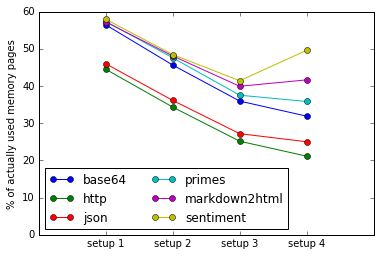

In [16]:
df = pd.DataFrame({'x': range(1,5), 
                   'base64': app_diff_setup[0],
                   'http': app_diff_setup[1],
                   'json': app_diff_setup[2],
                   'primes': app_diff_setup[3],
                   'markdown2html': app_diff_setup[4],
                   'sentiment': app_diff_setup[5]})

plt.plot('x', 'base64', data=df, marker='o')
plt.plot('x', 'http', data=df, marker='o')
plt.plot('x', 'json', data=df, marker='o')
plt.plot('x', 'primes', data=df, marker='o')
plt.plot('x', 'markdown2html', data=df, marker='o')
plt.plot('x', 'sentiment', data=df, marker='o')
plt.legend(loc='best', ncol=2)
plt.ylabel('% of actually used memory pages')
plt.ylim(bottom=0, top=60)
plt.xlim(left=0, right=5)
plt.xticks(range(1,6), ['setup 1', 'setup 2', 'setup 3', 'setup 4'])
plt.savefig('app_setup.eps', format='eps')

In [9]:
ind = np.arange(len(apps))
width = 0.25

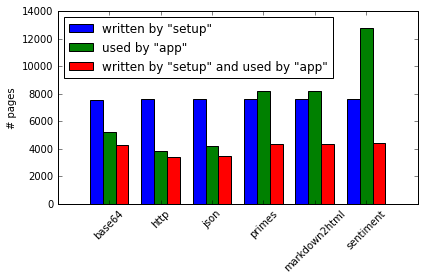

In [10]:
fig, ax = plt.subplots()
rect1 = ax.bar(ind-width, setup1_raw_setup, width, label='written by "setup"')
rect2 = ax.bar(ind, setup1_raw_app, width, label='used by "app"')
rect3 = ax.bar(ind+width, setup1_raw_both, width, label='written by "setup" and used by "app"')
ax.set_xticks(ind)
ax.set_xticklabels(apps, rotation=45)
ax.set_ylabel('# pages')
ax.legend(loc='best')
fig.tight_layout()

In [11]:
plt.savefig('setup1_raw_num.eps')

<Figure size 432x288 with 0 Axes>

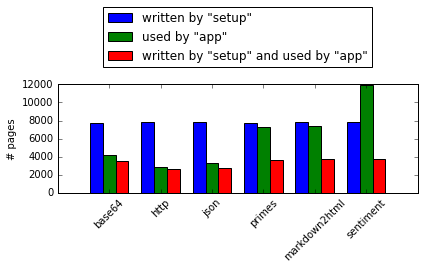

In [12]:
fig, ax = plt.subplots()
rect1 = ax.bar(ind-width, setup2_raw_setup, width, label='written by "setup"')
rect2 = ax.bar(ind, setup2_raw_app, width, label='used by "app"')
rect3 = ax.bar(ind+width, setup2_raw_both, width, label='written by "setup" and used by "app"')
ax.set_xticks(ind)
ax.set_xticklabels(apps, rotation=45)
ax.set_ylabel('# pages')
ax.legend(loc='lower center', bbox_to_anchor=(0, 1.1, 1, 1))
fig.tight_layout()

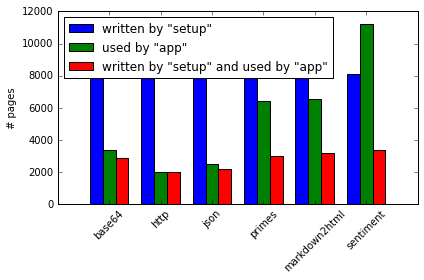

In [13]:
fig, ax = plt.subplots()
rect1 = ax.bar(ind-width, setup3_raw_setup, width, label='written by "setup"')
rect2 = ax.bar(ind, setup3_raw_app, width, label='used by "app"')
rect3 = ax.bar(ind+width, setup3_raw_both, width, label='written by "setup" and used by "app"')
ax.set_xticks(ind)
ax.set_xticklabels(apps, rotation=45)
ax.set_ylabel('# pages')
ax.legend(loc='best')
fig.tight_layout()

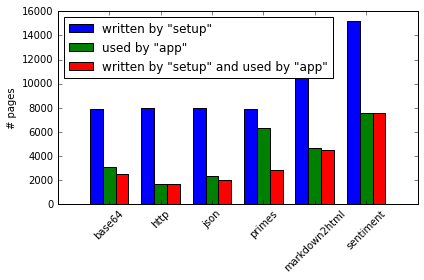

In [14]:
fig, ax = plt.subplots()
rect1 = ax.bar(ind-width, setup4_raw_setup, width, label='written by "setup"')
rect2 = ax.bar(ind, setup4_raw_app, width, label='used by "app"')
rect3 = ax.bar(ind+width, setup4_raw_both, width, label='written by "setup" and used by "app"')
ax.set_xticks(ind)
ax.set_xticklabels(apps, rotation=45)
ax.set_ylabel('# pages')
ax.legend(loc='best')
fig.tight_layout()